In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [2]:
np.random.seed(10)
num_students = 300
grades = np.random.normal(70, 10, num_students)
marks = np.random.normal(75, 12, num_students)
attendance = np.random.uniform(50, 100, num_students)
dropout_risk = ((grades < 60) | (marks < 65) | (attendance < 70)).astype(int)
students = pd.DataFrame({
    'Grades': grades,
    'Marks': marks,
    'Attendance': attendance,
    'DropoutRisk': dropout_risk
})


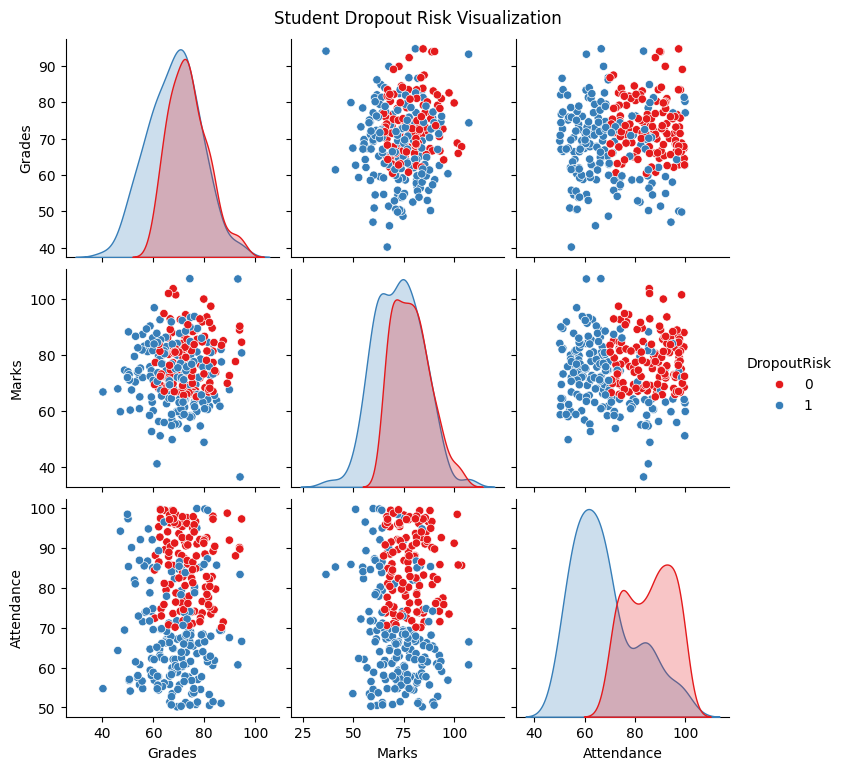

In [3]:
sns.pairplot(students, hue='DropoutRisk', palette='Set1')
plt.suptitle('Student Dropout Risk Visualization', y=1.02)
plt.show()


In [4]:
X = students[['Grades', 'Marks', 'Attendance']]
y = students['DropoutRisk']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [6]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[30  1]
 [ 1 43]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.98      0.98      0.98        44

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



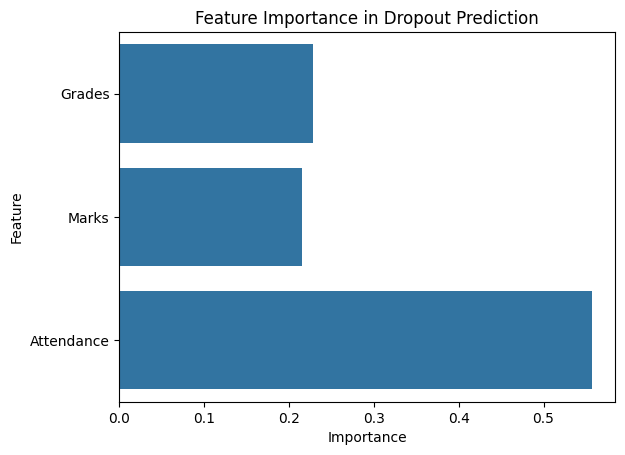

In [7]:
importances = model.feature_importances_
features = ['Grades', 'Marks', 'Attendance']
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in Dropout Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
